<a href="https://colab.research.google.com/github/SebaCarrilloS/Formacion-Data-Science/blob/main/(Final)_Desaf%C3%ADo_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafío 2 - Aprendizaje supervisado y no supervisado (Parte I)**

Nombre: Sebastián Carrillo

Curso: Machine Learning (G80)

En el apasionante mundo del comercio minorista, el supermercado "FreshMart" se ha convertido en el lugar preferido para realizar las compras del día a día. Con el objetivo de brindar una experiencia de compra más personalizada, "FreshMart" ha decidido emplear técnicas de aprendizaje no supervisado para segmentar a sus clientes y diseñar estrategias de marketing adaptadas a sus necesidades y preferencias.

Con un amplio conjunto de datos recopilados durante el último año, que incluyen
información de compras y perfiles de clientes, "FreshMart" cuenta con una valiosa fuente de información para el análisis. Ahora, el desafío radica en aplicar técnicas de clustering innovadoras para descubrir segmentos de clientes que comparten patrones de compra similares y comportamientos de consumo.

El objetivo principal de la segmentación de clientes es identificar grupos específicos dentro de la base de clientes de "FreshMart" que puedan beneficiarse de promociones y campañas de marketing personalizadas. La idea es poder caracterizar estos segmentos y ponerle un nombre a cada uno.

Una vez que se logre una segmentación efectiva, se abrirán las puertas a oportunidades emocionantes. El análisis detallado de cada segmento permitirá comprender los patrones de compra, las preferencias de productos y la disposición a participar en programas de fidelidad. Esto allanará el camino para el diseño de estrategias de marketing personalizadas, como descuentos exclusivos, promociones especiales y recomendaciones de productos
relevantes.

El objetivo final de "FreshMart" es mejorar la satisfacción del cliente y optimizar la rentabilidad del supermercado. Al emplear técnicas de clustering avanzadas y aprovechar los datos históricos disponibles, "FreshMart" estará en condiciones de ofrecer una experiencia de compra más personalizada y adaptada a las necesidades de cada segmento de clientes. Esto consolida la fidelidad de los clientes existentes y atrae a nuevos clientes que buscan un supermercado que se preocupe por sus preferencias individuales.

La data entregada esta a nivel de boleta y tiene los siguientes campos:
- **InvoiceNo**: Nro identificador de cada boleta
- **InvoiceDate**: Fecha de la boleta
- **CustomerId**: Nro identificador de cada usuario
- **Quantity**: Cantidad de unidades totales compradas
- **price_total**: Precio total de la boleta
- **StockCode**: Cantidad de unidades diferentes compradas

A partir de estos datos se te solicita:

### 1. Leer el archivo `Retail_Invoices.xlsx` y realizar un análisis de calidad de datos, para definir la calidad de la data entregada considerando valores anómalos, valores faltantes, etc. Limpia lo que sea necesario y realiza un análisis exploratorio de los datos considerando gráficos de distribuciones y correlaciones entre estos.

In [ ]:
#Importamos librerías que podemos utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Formación Data Science/Desafío Latam/Módulo 5 - Machine Learning/Desafios/Desafio 2/Retail_Invoices.xlsx')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
df[["Quantity","price_total","StockCode"]].describe()

,Quantity,price_total,StockCode
count,22190.000000,22190.000000,22190.000000
mean,221.130599,374.045327,18.333889
std,1170.215301,2018.482869,23.892111
min,-80995.000000,-168469.600000,1.000000
25%,30.000000,87.962500,3.000000
50%,120.000000,241.505000,12.000000
75%,254.000000,418.022500,24.000000
max,80995.000000,168469.600000,542.000000


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,0
Quantity,0
price_total,0
StockCode,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
InvoiceNo,22190
InvoiceDate,305
CustomerID,4372
Quantity,1594
price_total,16534
StockCode,199


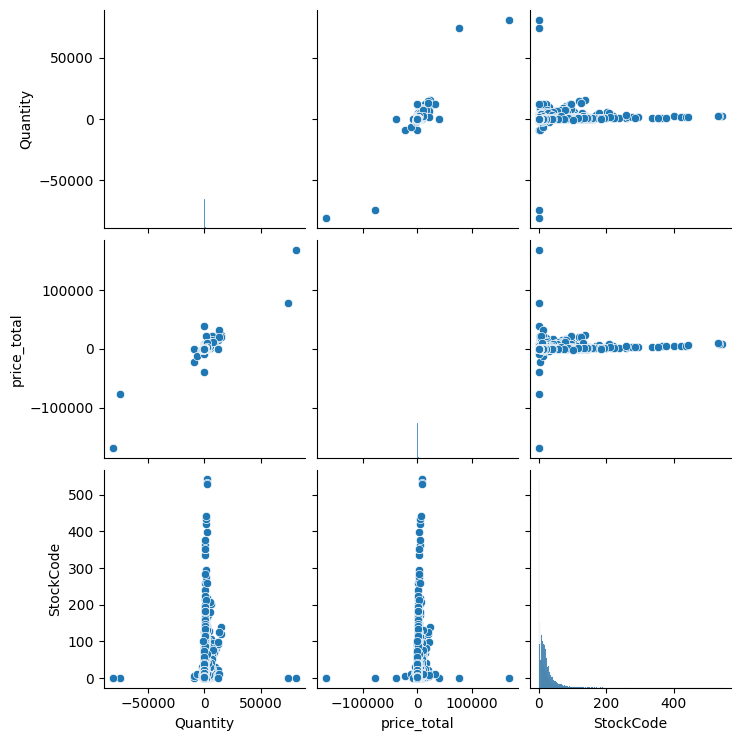

In [ ]:
sns.pairplot(df[["Quantity","price_total","StockCode"]])

<Axes: xlabel='Quantity', ylabel='Count'>

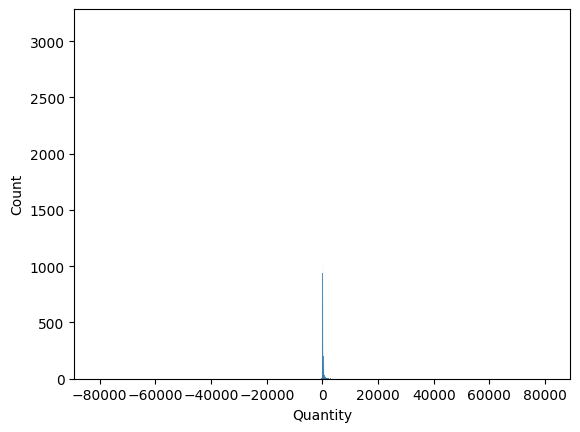

In [ ]:
sns.histplot(df["Quantity"])

In [ ]:
# Valores de cantidad, precios y stock tienen que ser positivos
df["Quantity"]=df["Quantity"].abs()
df["price_total"]=df["price_total"].abs()
df["StockCode"]=df["StockCode"].abs()

<Axes: xlabel='Quantity', ylabel='Count'>

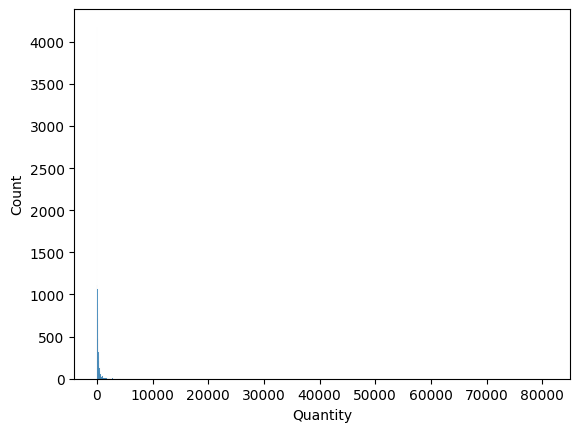

In [ ]:
sns.histplot(df["Quantity"])

In [ ]:
#Trabajamos con el 99% ded los datos de cantidad para no alterar tanto futuros resultados
cantidad_99 = df['Quantity'].quantile(0.99)
cantidad_99


2084.1100000000006

In [ ]:
df=df[df["Quantity"]<cantidad_99]

<Axes: xlabel='Quantity', ylabel='Count'>

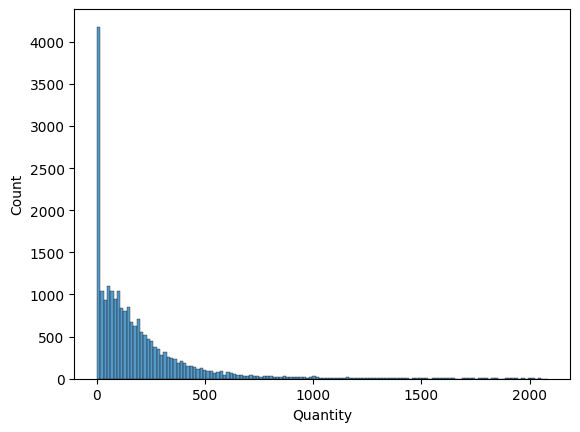

In [ ]:
sns.histplot(df["Quantity"])

In [ ]:
df[["Quantity","price_total","StockCode"]].corr()

,Quantity,price_total,StockCode
Quantity,1.000000,0.589387,0.411218
price_total,0.589387,1.000000,0.274352
StockCode,0.411218,0.274352,1.000000


<Axes: >

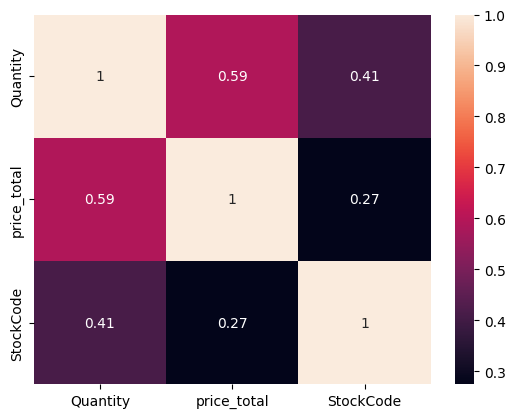

In [ ]:
sns.heatmap(df[["Quantity","price_total","StockCode"]].corr(),annot=True)

In [ ]:
# Misma idea con precios
precio_99 = df['price_total'].quantile(0.99)
precio_99

2212.161299999991

In [ ]:
df=df[df["price_total"]<precio_99]

<Axes: >

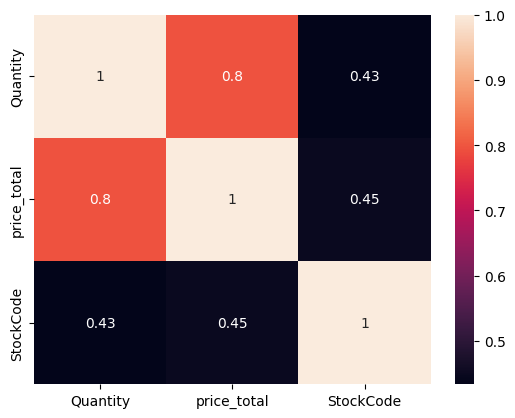

In [ ]:
sns.heatmap(df[["Quantity","price_total","StockCode"]].corr(),annot=True)

### 2. Generar variables para la segmentación. Notar que la granularidad de la data es por boleta y se necesita segmentar clientes, por lo que es necesario generar variables a nivel de clientes. Se propone generar al menos RFM (Recencia, frecuencia y monto).

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
fecha_referencia = df['InvoiceDate'].max()

In [ ]:
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (fecha_referencia - x.max()).days,  # Recencia
    'InvoiceNo': 'count',  # Frecuencia
    'price_total': 'sum'    # Monto
}).reset_index()
rfm_df

,CustomerID,InvoiceDate,InvoiceNo,price_total
0,12347,2,7,4310.00
1,12348,75,4,1797.24
2,12349,18,1,1757.55
3,12350,310,1,334.40
4,12352,36,11,3466.67
...,...,...,...,...
4351,18280,277,1,180.60
4352,18281,180,1,80.82
4353,18282,7,3,179.50
4354,18283,3,16,2094.88


### 3. Realizar un análisis exploratorio y las transformaciones necesarias a las nuevas variables.

In [ ]:
rfm_df.describe()

,CustomerID,InvoiceDate,InvoiceNo,price_total
count,4356.000000,4356.000000,4356.000000,4356.000000
mean,15303.760790,91.647153,4.992654,1569.251723
std,1720.162629,100.761704,9.025920,3564.514897
min,12347.000000,0.000000,1.000000,1.250000
25%,13818.500000,17.000000,1.000000,307.142500
50%,15305.000000,50.000000,3.000000,671.100000
75%,16780.250000,143.000000,5.000000,1635.750000
max,18287.000000,373.000000,240.000000,129711.810000


In [ ]:
#Como hay un máximo muy elevado, trabajaremos con el 99% de los precios totales
preciototal_99=rfm_df['price_total'].quantile(0.99)
preciototal_99

13408.181499999968

In [ ]:
# Eliminamos el valor del dataframe
rfm_df=rfm_df[rfm_df["price_total"]<preciototal_99]

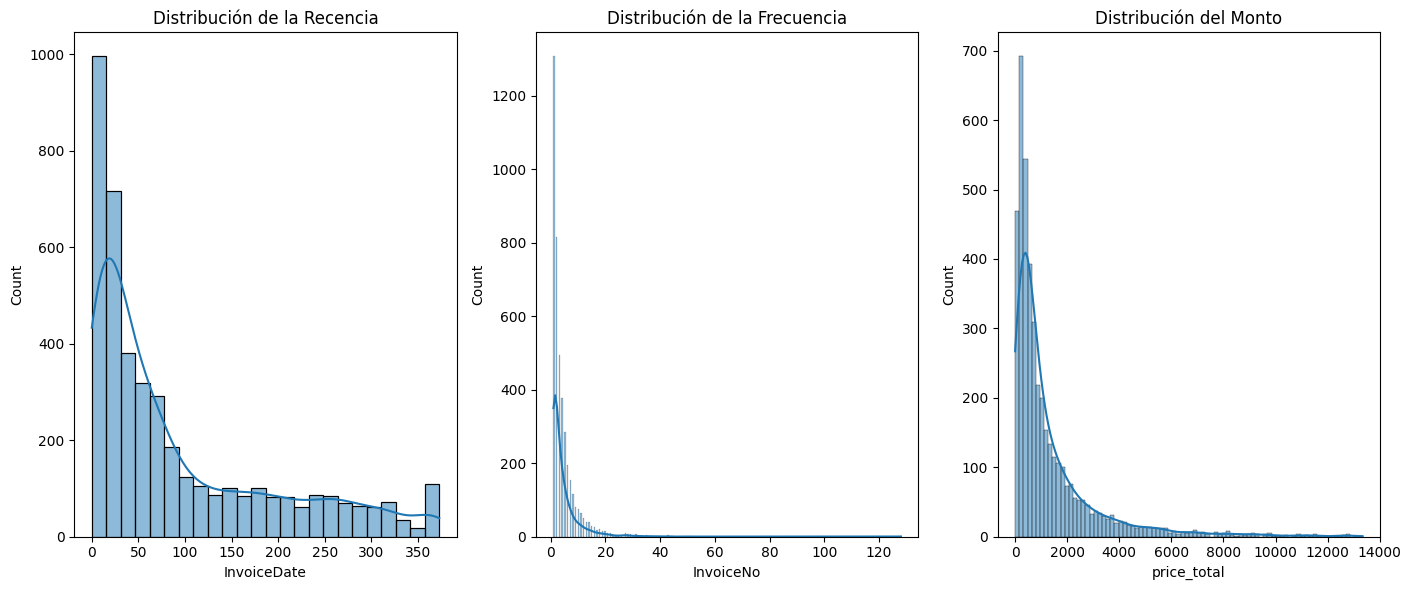

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['InvoiceDate'], kde=True)
plt.title('Distribución de la Recencia')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['InvoiceNo'], kde=True)
plt.title('Distribución de la Frecuencia')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['price_total'], kde=True)
plt.title('Distribución del Monto')

plt.tight_layout()

Text(0.5, 1.0, 'Correlaciones entre variables RFM')

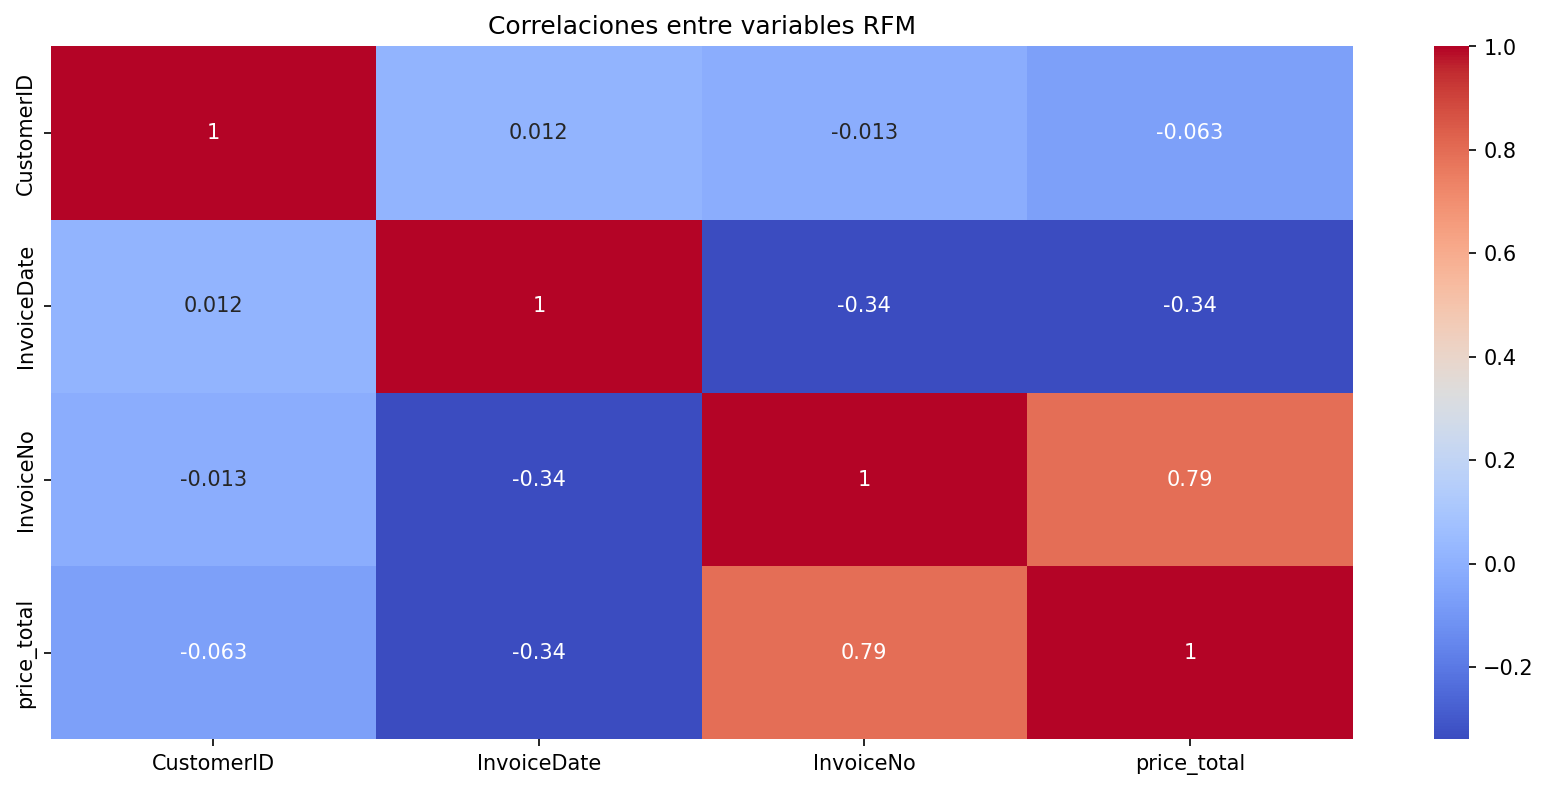

In [ ]:
plt.figure(figsize=(14, 6),dpi=150)
sns.heatmap(rfm_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables RFM')

### 4. Aplicar al menos 2 algoritmos de clustering. Buscar el número indicado de clusters que pueden tener y visualizar los cluster resultantes de los algoritmos.

### 5. Evaluar la calidad de los clustering de forma numérica y realizar una explicación de cada segmento asignándoles un nombre descriptivo.

**Nota**: Se harán ambas preguntas al mismo tiempo

#**Con K-Means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
## Aplicando método del codo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(rfm_df)
    sse.append(kmeans.inertia_)


Text(0, 0.5, 'SSE')

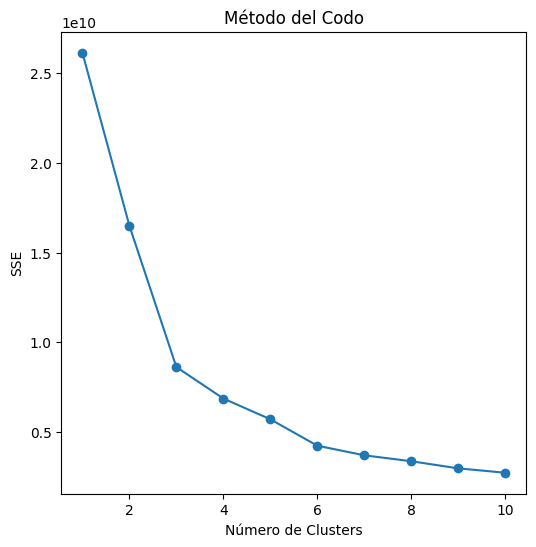

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(rfm_df)
    print(f"Silhouette Score para {i}-clusters: {np.round(100*silhouette_score(rfm_df, kmeans.labels_),2)}%")

Silhouette Score para 2-clusters: 42.28%
Silhouette Score para 3-clusters: 48.29%
Silhouette Score para 4-clusters: 48.06%
Silhouette Score para 5-clusters: 45.17%
Silhouette Score para 6-clusters: 43.21%
Silhouette Score para 7-clusters: 42.68%
Silhouette Score para 8-clusters: 42.37%
Silhouette Score para 9-clusters: 41.06%
Silhouette Score para 10-clusters: 41.2%


In [ ]:
## Se ve que mejor grupo es con 5 clusters, pues baja después ya no es tan significativa.
kmeans = KMeans(n_clusters=5,n_init='auto', random_state=42)
kmeans.fit(rfm_df)

rfm_df['Cluster'] = kmeans.labels_



<ipython-input-32-cf1e11f974e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster'] = kmeans.labels_


<Figure size 2100x1200 with 0 Axes>

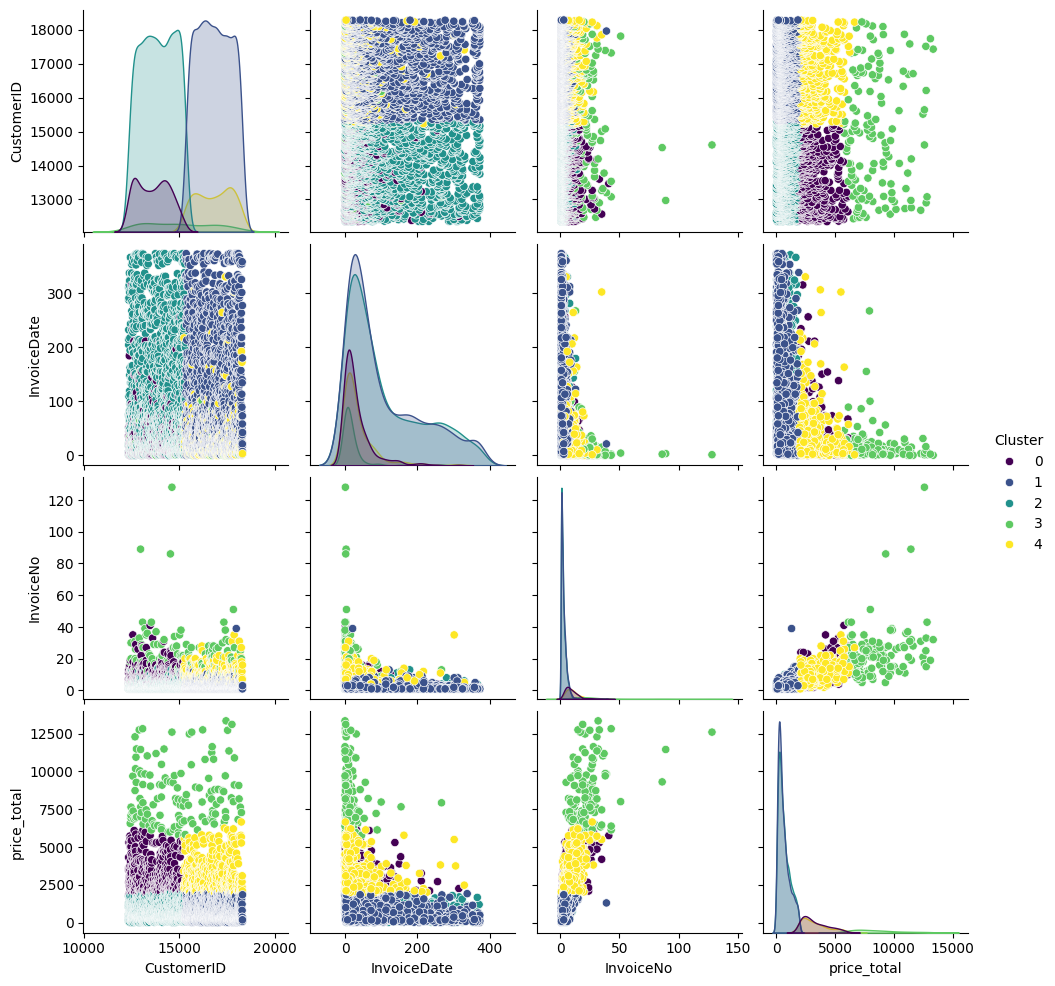

In [ ]:
plt.figure(figsize=(14, 8),dpi=150)
sns.pairplot(rfm_df, hue='Cluster', palette='viridis')

# Con Cluster Jerarquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_methods = ['ward', 'complete', 'average', 'single']

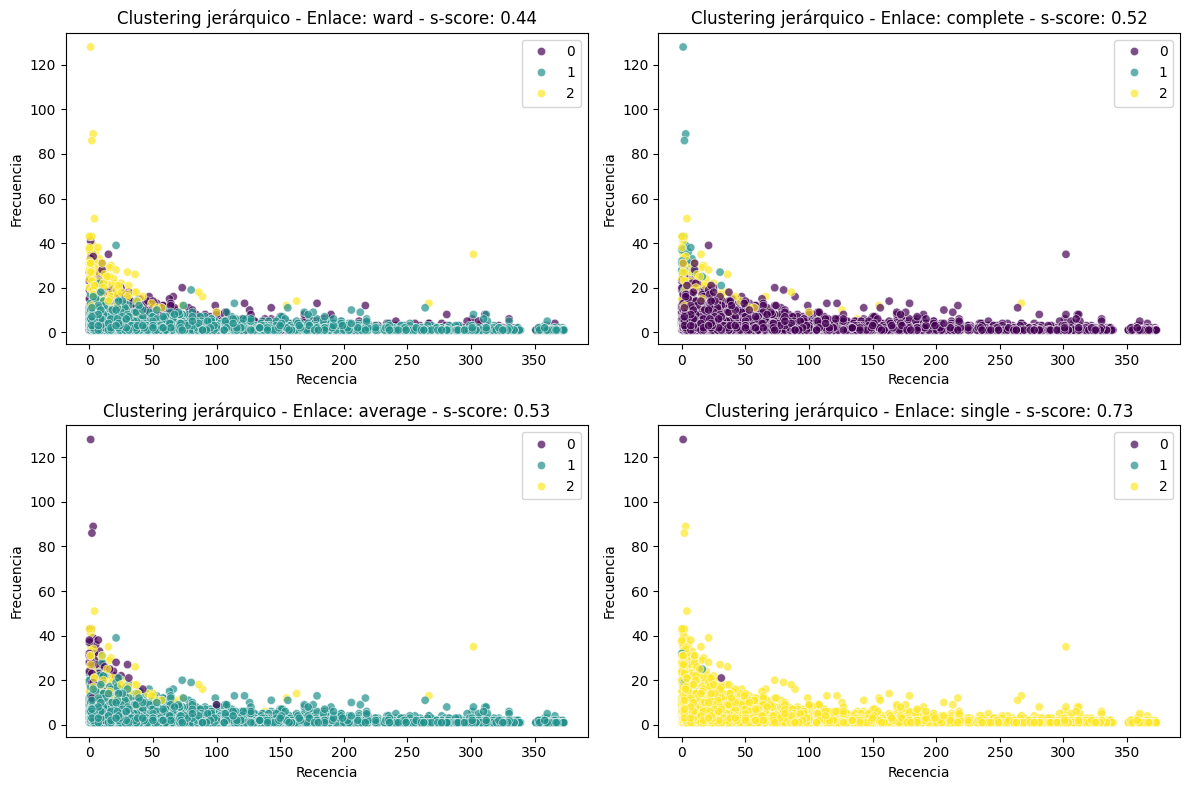

In [ ]:
plt.figure(figsize=(12, 8))
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(rfm_df)

    # Calcular el Silhouette Score
    sc = silhouette_score(rfm_df, labels)

    # Graficar los puntos en un diagrama de dispersión (usamos Recencia y Frecuencia)
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=rfm_df, x='InvoiceDate', y='InvoiceNo', hue=labels, palette='viridis', alpha=0.7)
    plt.xlabel('Recencia')
    plt.ylabel('Frecuencia')
    plt.title(f'Clustering jerárquico - Enlace: {method} - s-score: {sc:.2f}')

plt.tight_layout()

Text(0, 0.5, 'Distancia')

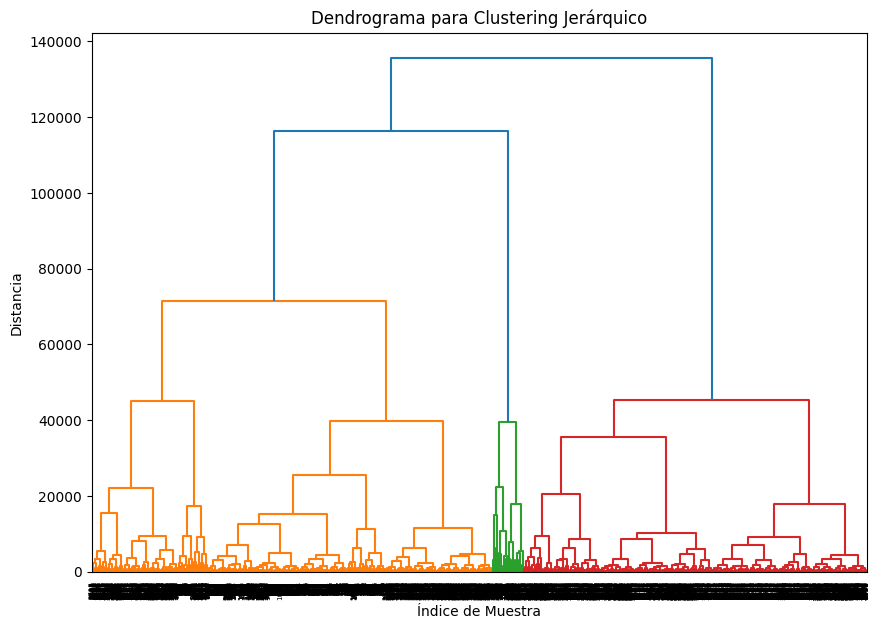

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clustering.fit_predict(rfm_df)
# Analizar los clusters obtenidos
for cluster in range(3):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_samples = rfm_df.iloc[cluster_indices]
    print(f'Cluster {cluster}:')
    print(f'Número de muestras: {len(cluster_samples)}')

    mean_features = np.mean(cluster_samples, axis=0)
    print(f'Características más representativas (promedio):\n{mean_features}')

    print('---')

Cluster 0:
Número de muestras: 2229
Características más representativas (promedio):
CustomerID              13956.657245
InvoiceDate                88.335576
InvoiceNo                   4.377299
price_total              1317.288462
Cluster                     1.745626
Cluster_Hierarchical        0.000000
dtype: float64
---
Cluster 1:
Número de muestras: 1909
Características más representativas (promedio):
CustomerID              16844.514405
InvoiceDate               104.107910
InvoiceNo                   3.129911
price_total               759.155072
Cluster                     1.292823
Cluster_Hierarchical        1.000000
dtype: float64
---
Cluster 2:
Número de muestras: 174
Características más representativas (promedio):
CustomerID              15735.660920
InvoiceDate                18.862069
InvoiceNo                  20.844828
price_total              7551.107529
Cluster                     3.321839
Cluster_Hierarchical        2.000000
dtype: float64
---


In [ ]:
silhouette_scores_jer = []

for n_clusters in range(2, 11):  # Comenzar en 2 porque el silhouette score no es significativo con 1 cluster
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(rfm_df)

    # Calcular el silhouette score
    score = silhouette_score(rfm_df, labels)
    silhouette_scores_jer.append(score)
    print(f"Silhouette Score para {n_clusters}-clusters: {np.round(100*score, 2)}%")

Silhouette Score para 2-clusters: 39.52%
Silhouette Score para 3-clusters: 44.49%
Silhouette Score para 4-clusters: 44.3%
Silhouette Score para 5-clusters: 33.39%
Silhouette Score para 6-clusters: 33.92%
Silhouette Score para 7-clusters: 31.18%
Silhouette Score para 8-clusters: 31.89%
Silhouette Score para 9-clusters: 34.75%
Silhouette Score para 10-clusters: 34.57%


#**Conclusiones:**

- Se puede ver que para ambos casos, la cantidad de clusters más ideal serían 3 clusters, dado el valor del "Silhouette Score" después de estos clusters no varía del todo.
- En los gráficos también expuestos en ambos casos, también se pueden diferenciar de manera clara los difentes grupos.
- También se pueden apreciar 3 grupos bien diferenciados, donde la diferencia de precios es significativa entre las 3, la cual permitiría clasificar a los clientes en grupos que gastan más, otro de gasto moderado y otro de gastos menores.